<a href="https://colab.research.google.com/github/gabopy-glitch/Aprendizaje-Autom-tico/blob/main/02_Prep_Datos_Metricas_Modelos_Piedra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/andres-merino/AprendizajeAutomaticoInicial-05-N0105/blob/main/2-Ejercicios/02-Prep-Datos-Metricas-Modelos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table style="border: none; border-collapse: collapse;">
    <tr>
        <td style="width: 20%; vertical-align: middle; padding-right: 10px;">
            <img src="https://i.imgur.com/nt7hloA.png" width="100">
        </td>
        <td style="width: 2px; text-align: center;">
            <font color="#0030A1" size="7">|</font><br>
            <font color="#0030A1" size="7">|</font>
        </td>
        <td>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="5">
                <b>Facultad de Ciencias Exactas, Naturales y Ambientales</b>
            </font> </p>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="4">
                Aprendizaje Automático Inicial &bull; Preparación de Datos y Métricas de Evaluación
            </font></p>
            <p style="font-style: oblique;"><font color="#0030A1" size="3">
                Gabriel Piedra &bull; 07-12-2025
            </font></p>
        </td>  
    </tr>
</table>

---
## <font color='264CC7'> Introducción </font>

A lo largo de este taller veremos como aplicar diferentes técnicas para la carga y preparación de datos y las métricas de modelos.
   
Para eso necesitaremos las siguientes librerías:

In [75]:
# Paquetes necesarios
import pandas as pd
from pandas import read_csv
from sklearn import datasets
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

---
## <font color='264CC7'> Lectura de Datos </font>


Primero, necesitas cargar el conjunto de datos "Boston house prices", que contiene información sobre el valor de las casas en diferentes áreas de Boston basado en múltiples factores. Este conjunto de datos está disponible para su descarga [aquí](https://raw.githubusercontent.com/rupakc/UCI-Data-Analysis/refs/heads/master/Boston%20Housing%20Dataset/Boston%20Housing/housing.data); la descripción de las variables  de puede encontrar [aquí](https://github.com/rupakc/UCI-Data-Analysis/blob/master/Boston%20Housing%20Dataset/Boston%20Housing/housing.names).

En los ejercicios de esta actividad, usaremos como variable objetivo para regresión "MEDV", que representa la mediana del valor de las casas en una zona de Boston (en miles de dólares, k$); y para clasificación, la variable "CHAS", que indica si la casa está cerca del río Charles (1) o no (0).

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Carga el conjunto de datos "boston house-prices dataset" y muestra:
<ul>
  <li>El número y nombre de los atributos.</li>
  <li>El número de filas del conjunto de datos.</li>
  <li>Verifica si hay "missing values" y en qué columnas.</li>
</ul>
</div>

In [76]:
#Tomamos los nombres de las variables del link provisto (el dataset no incluye encabezados)
columnas = [
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS",
    "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"
]

#Realizamos la lectura de la data desde la web y agregamos lso nombres
data = pd.read_csv("https://raw.githubusercontent.com/rupakc/UCI-Data-Analysis/refs/heads/master/Boston%20Housing%20Dataset/Boston%20Housing/housing.data", delim_whitespace=True, header=None, names=columnas)

print()
print(f"Número de columnas: {data.shape[1]}")
print()
print(f"Columnas: {data.columns}")
print()
print(f"Número de filas: {data.shape[0]}")
print()
print("Missing values por columna:")
print(data.isnull().sum())


Número de columnas: 14

Columnas: Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

Número de filas: 506

Missing values por columna:
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


/tmp/ipython-input-310660357.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv("https://raw.githubusercontent.com/rupakc/UCI-Data-Analysis/refs/heads/master/Boston%20Housing%20Dataset/Boston%20Housing/housing.data", delim_whitespace=True, header=None, names=columnas)


---
## <font color='264CC7'> Análisis de los datos </font>

### <font color='264CC7'> Análisis estadístico básico </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Realiza un análisis estadístico básico:
<br>

<ul>
  <li>Variables categóricas:</li>
     <ul>
      <li>Calcula la frecuencia.</li>
      <li>Realiza un gráfico de barras.</li>
    </ul>
  <li>Variables numéricas:</li>
    <ul>
      <li>Calcula estadísticos descriptivos básicos como media, mediana, desviación estándar, entre otros.</li>
      <li>Realiza un histograma para las variables INDUS, AGE y MEDV.</li>
    </ul>
</ul>
    
<hr>
Sugerencia: Puedes usar la librería 'pandas' y sus funciones 'describe' y 'value_counts', así como las funciones 'bar' e 'hist' de matplotlib.
</div>


Frecuencia de CHAS:
CHAS
0    471
1     35
Name: count, dtype: int64


<Axes: xlabel='CHAS'>

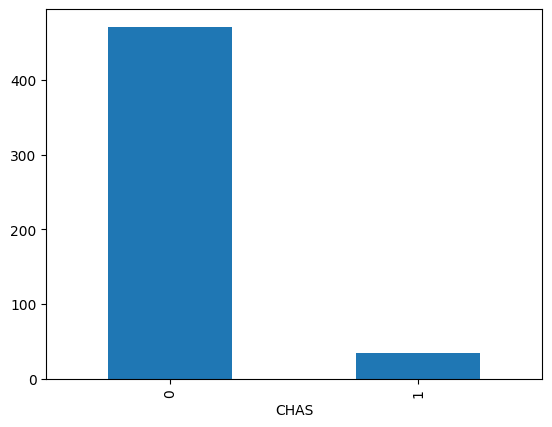

In [77]:
#Calculo la frecuandia de las variables categoricas y relizo su gráfico de barras
print("Frecuencia de CHAS:")
print(data["CHAS"].value_counts())
data["CHAS"].value_counts().plot(kind="bar")

In [78]:
#Ahora calculamos la estadística descriptiva de variables numéricas
print("Estadísticas descriptivas de las variables numéricas:")
data.describe()

Estadísticas descriptivas de las variables numéricas:


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<Axes: >

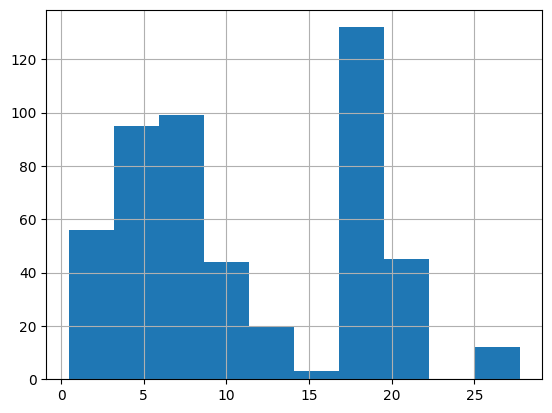

In [79]:
#Realizamos los histogramas de las variables solicitadas
data["INDUS"].hist()

<Axes: >

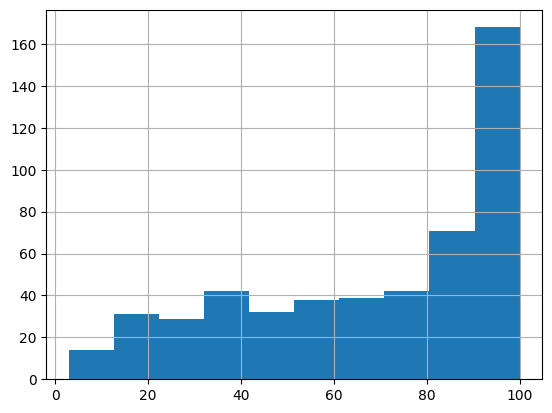

In [80]:
data["AGE"].hist()

<Axes: >

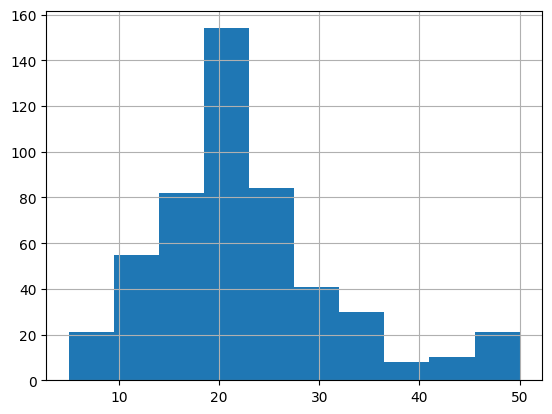

In [81]:
data["MEDV"].hist()

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Análisis:</strong><br>
Comenta los resultados.
</div>

### <font color='264CC7'> Análisis exploratorio de los datos </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Realiza un gráfico del histograma de valores de la variable MEDV, separado por los posibles valores de CHAS. Para comparar mejor los valores de MEDV según las diferentes clases de CHAS, los histogramas deben estar sobrepuestos. Agrega una leyenda para identificar a qué clase corresponde cada histograma.
    
El objetivo es observar cómo se distribuye el valor de la respuesta MEDV en función de la clase CHAS, para identificar visualmente si este atributo categórico está relacionado con diferentes valores de la respuesta.
    
<hr>
Sugerencia: Usa la función "hist" de la librería "matplotlib", utilizando el parámetro "alpha" para que se aprecien los histogramas sobrepuestos.<br>
Sugerencia: Para una mejor comparación, considera representar la densidad de probabilidad en lugar del número de entradas por bin. Esto permite usar la misma escala para cada clase y facilita la comparación. Puedes usar el parámetro "density" de la misma función "hist".  
</div>

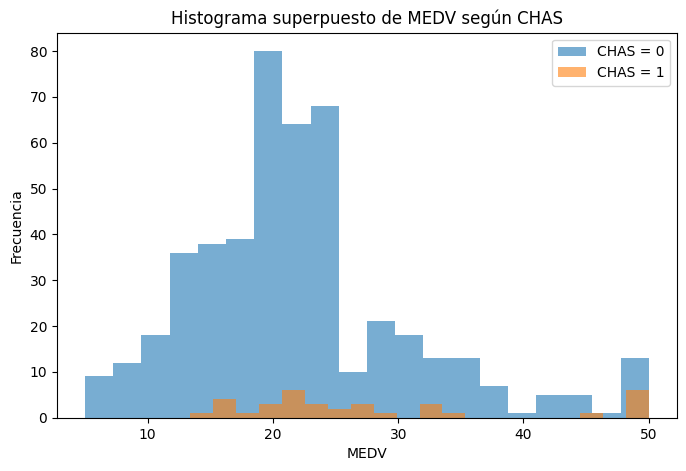

In [82]:
# Variable numérica a comparar
variable = "MEDV"

# Filtrar por CHAS
chas_0 = data[data["CHAS"] == 0][variable]
chas_1 = data[data["CHAS"] == 1][variable]

plt.figure(figsize=(8,5))

# Histograma para CHAS = 0
plt.hist(chas_0, bins=20, alpha=0.6, label="CHAS = 0")

# Histograma para CHAS = 1
plt.hist(chas_1, bins=20, alpha=0.6, label="CHAS = 1")

plt.xlabel(variable)
plt.ylabel("Frecuencia")
plt.title(f"Histograma superpuesto de {variable} según CHAS")
plt.legend()
plt.show()

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Análisis:</strong>
<br> Mirando los histogramas, ¿te parece que el atributo CHAS tendrá algún peso a la hora de predecir la mediana del precio de las casas, MEDV? ¿Porqué?
</div>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Calcula y muestra la correlación entre todos los atributos numéricos y la variable respuesta MEDV.
</div>


In [83]:
#Calcular la correlación de todas la variables con MEDV
correlaciones = data.corr()["MEDV"]
print(correlaciones)

CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
MEDV       1.000000
Name: MEDV, dtype: float64


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Representa gráficamente las relaciones entre todas las parejas de variables numéricas (sin incluir la variable respuesta) del conjunto de datos. El objetivo de este ejercicio es observar y analizar gráficamente las correlaciones entre las variables.
<hr>Sugerencia: Puedes usar la función "pairplot" de la librería 'seaborn'.
</div>


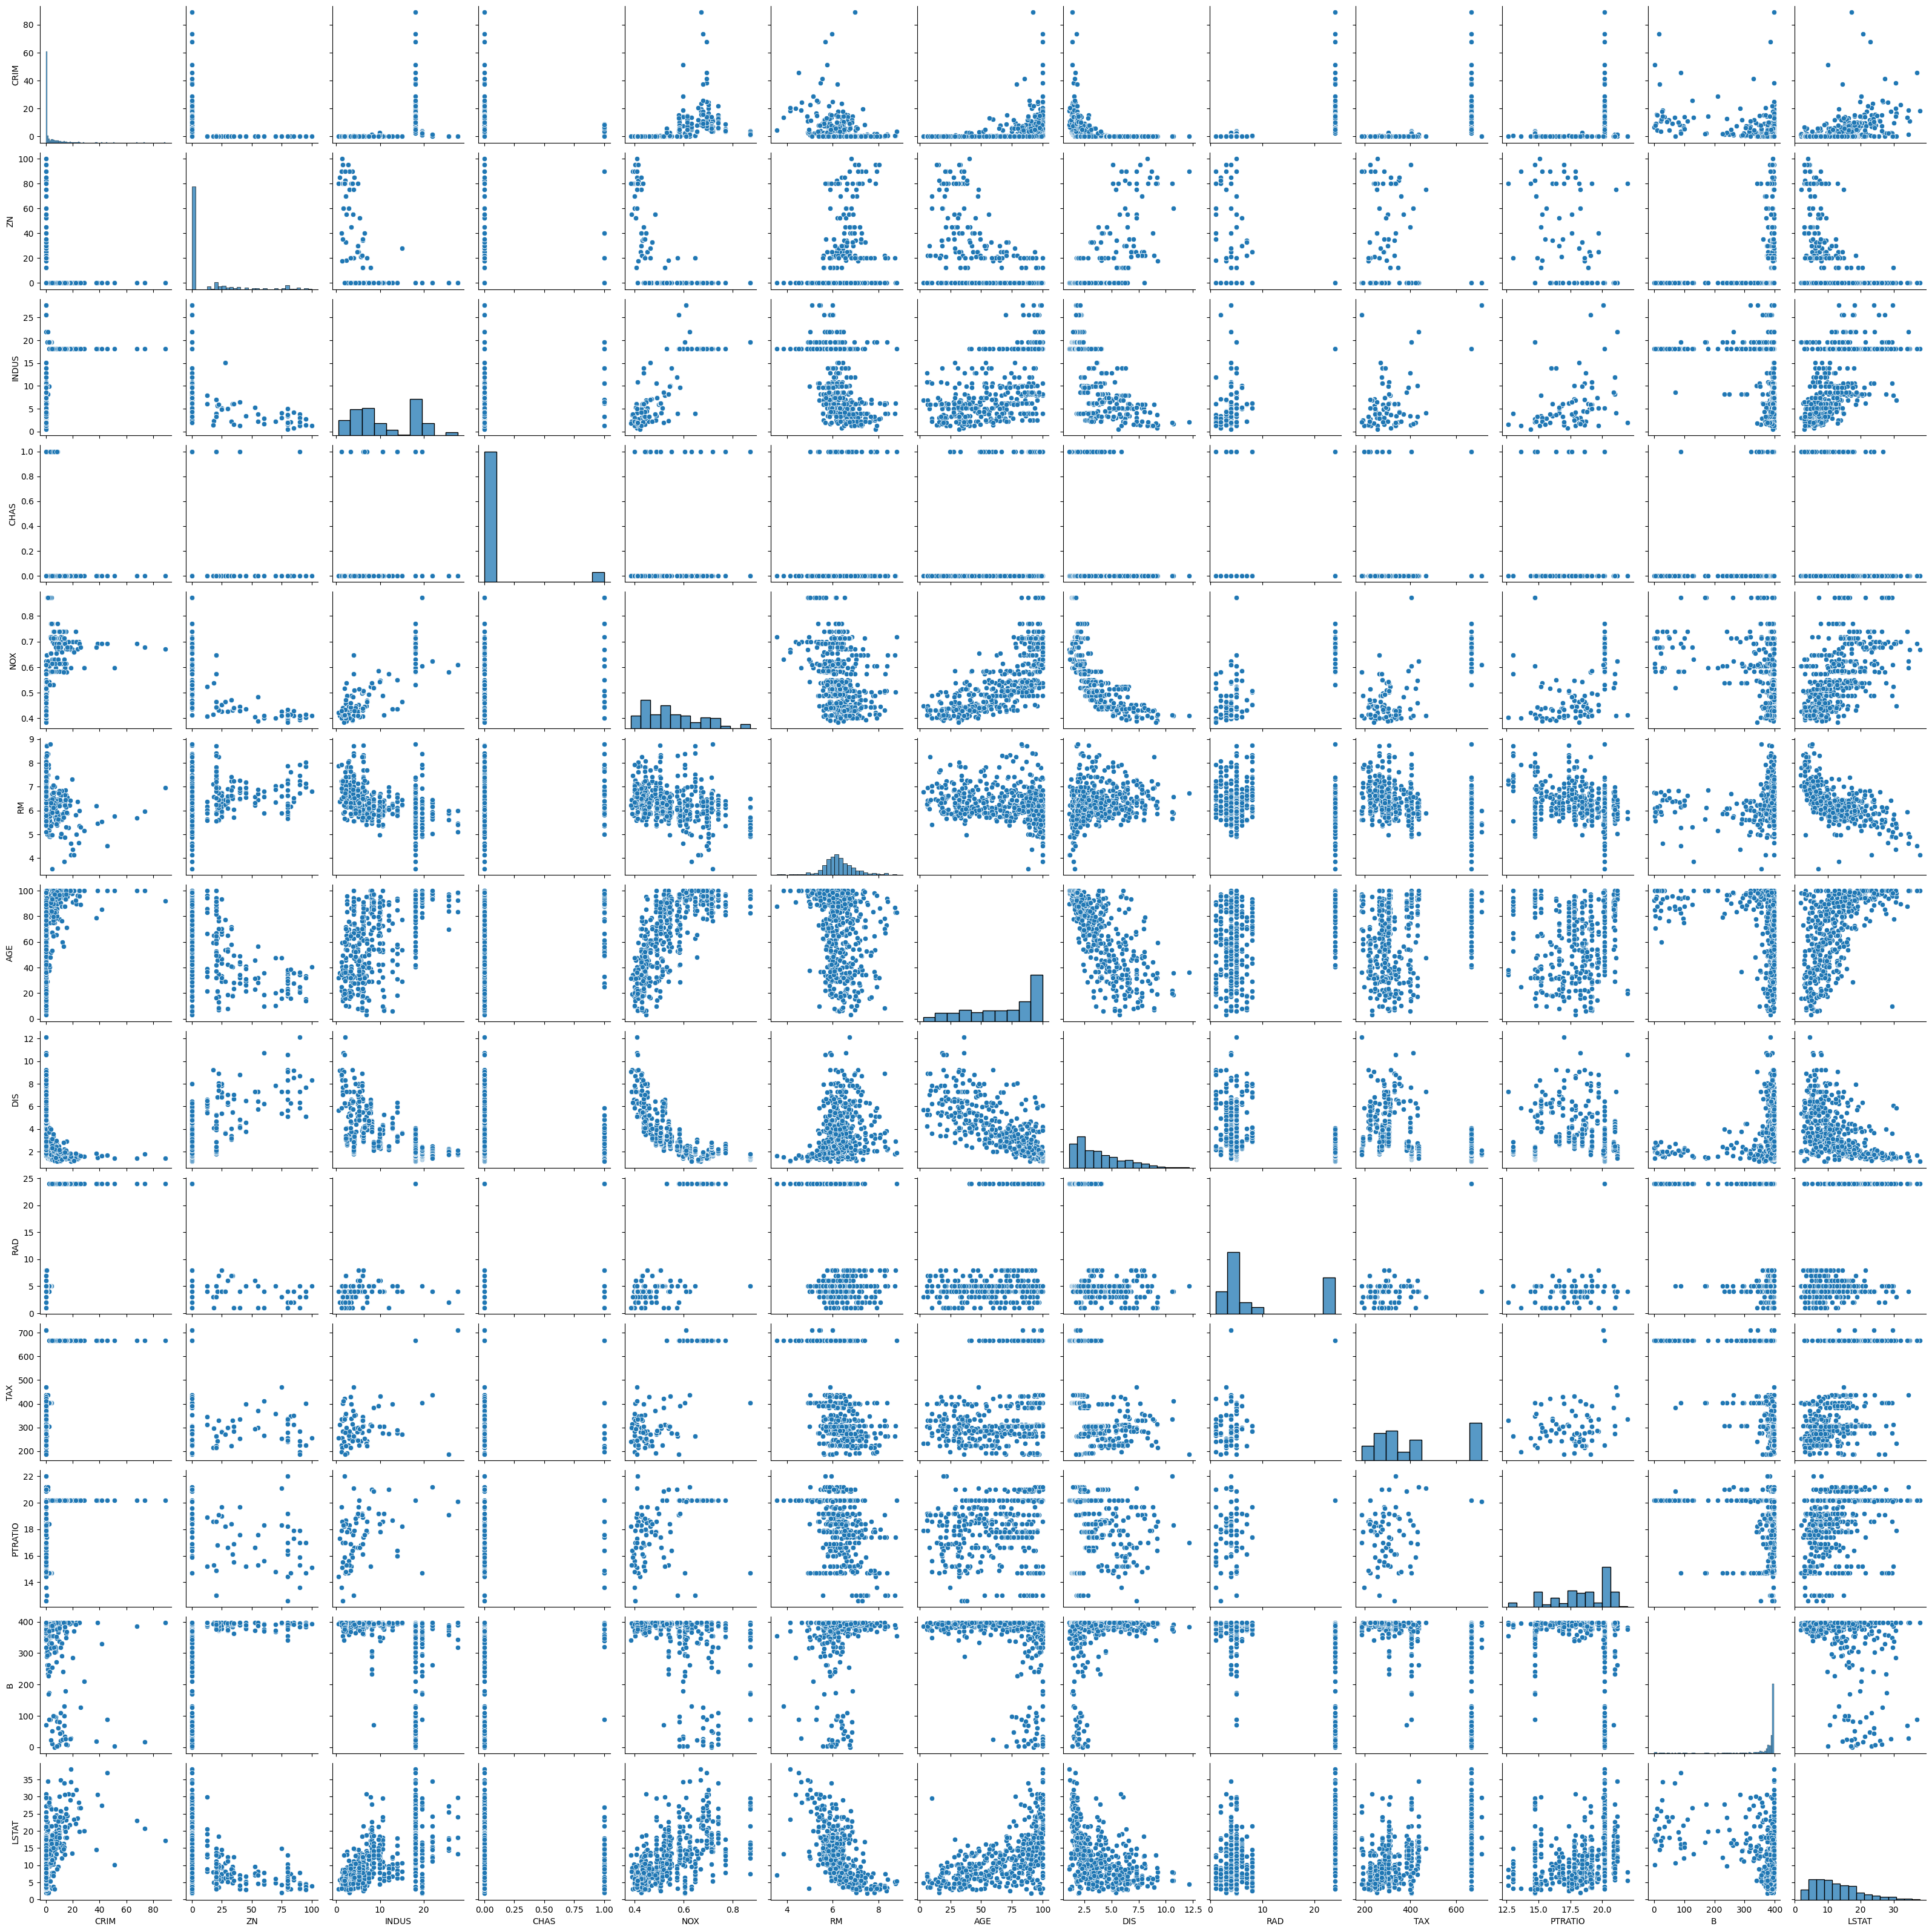

In [84]:
#Hacemos un gráfico de pares excluyendo la variable objetivo
sns.pairplot(data.drop("MEDV", axis=1))

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Identifica los 2 atributos con la correlación más fuerte con la variable respuesta y los 2 con la correlación más débil (considerando el valor absoluto del coeficiente de correlación).
    
Para analizar las correlaciones gráficamente, representa, para cada uno de los 4 atributos identificados, un scatter plot con el atributo en el eje x y la respuesta en el eje y. Además, añade en cada gráfico una regresión lineal que ajuste los puntos.
        
<hr>Sugerencia: Puedes usar la función "regplot" de la librería 'seaborn'.
</div>


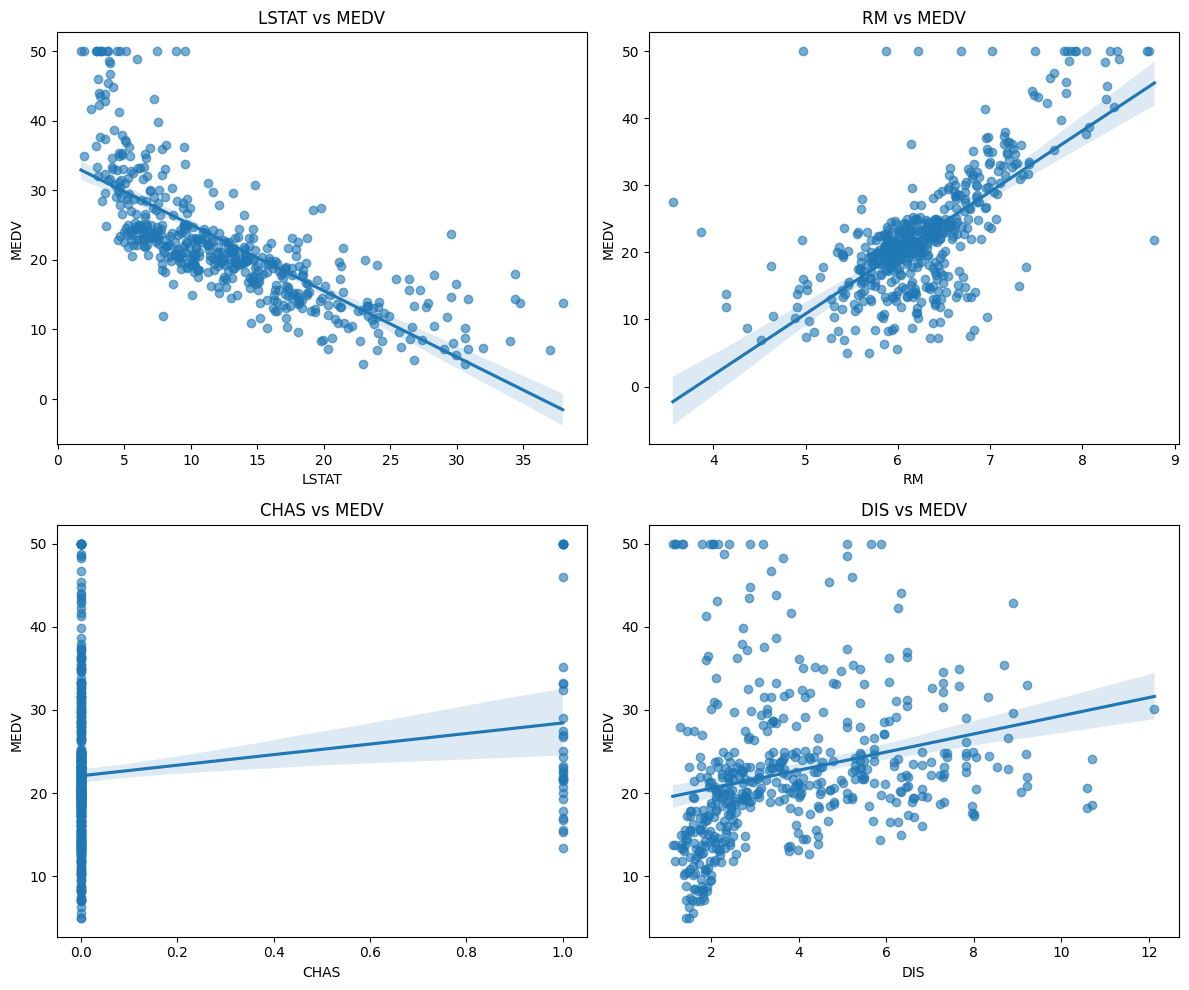

In [85]:
atributos_fuertes = ["LSTAT", "RM"]
atributos_debiles = ["CHAS", "DIS"]

atributos = atributos_fuertes + atributos_debiles

plt.figure(figsize=(12, 10))

for i, attr in enumerate(atributos, 1):
    plt.subplot(2, 2, i)
    sns.regplot(x=data[attr], y=data["MEDV"], scatter_kws={"alpha": 0.6})
    plt.title(f"{attr} vs MEDV")
    plt.xlabel(attr)
    plt.ylabel("MEDV")

plt.tight_layout()
plt.show()

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Análisis:</strong>
<br> Observando los gráficos, comenta brevemente si logras visualizar las correlaciones altas o bajas que identificaste numéricamente.
</div>


---
## <font color='264CC7'> Reducción de la dimensionalidad </font>


En este ejercicio aplicaremos métodos de reducción de dimensionalidad al conjunto original de datos. El objetivo es reducir el número de atributos a un nuevo conjunto con menos dimensiones, pero que conserven la máxima información posible presente en los atributos originales.


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
<ul>
    <li>Aplica el método de reducción de dimensionalidad Principal Component Analysis (PCA) para reducir a 2 dimensiones el dataset original que contiene todos los atributos.</li>
    <li>Genera un gráfico con el resultado del PCA, mostrando los valores de las dos componentes principales en los ejes x e y, y utilizando una escala de colores para representar el valor de la respuesta MEDV. El objetivo es visualizar cómo varía MEDV en función de las componentes principales generadas.</li>
</ul>
    
NOTA: Asegúrate de no incluir la variable objetivo "MEDV" en la reducción de dimensionalidad. Queremos explicar la variable objetivo en función del resto de variables reducidas a dos dimensiones.

<hr>
Sugerencia: No necesitas programar el algoritmo de PCA desde cero, puedes usar la implementación disponible en la librería "scikit-learn".<br>
Sugerencia: Para el gráfico, utiliza el scatter plot de matplotlib con el parámetro "c" para asignar los colores de los puntos según los valores de la variable objetivo.
</div>


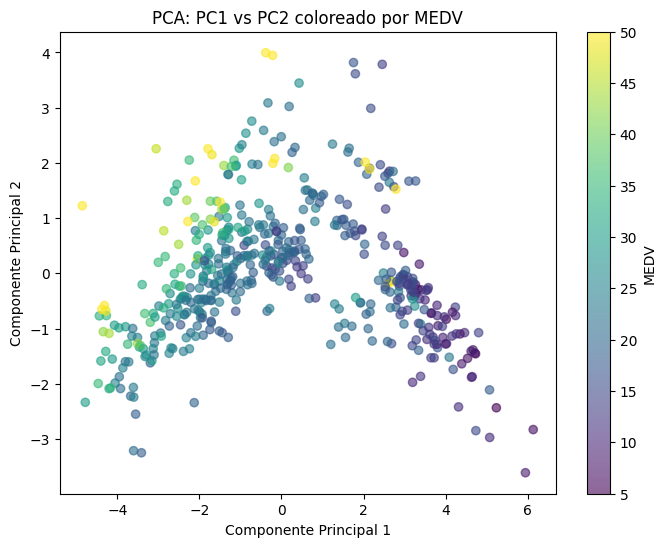

In [86]:
# Eliminamos la variable respuesta
X = data.drop(columns=["MEDV"])

# Estandarizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA con 2 componentes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Convertir a dataframe
X_pca_df = pd.DataFrame(X_pca, columns=["PC1", "PC2"])

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], alpha=0.6, c=data["MEDV"], cmap="viridis")
plt.colorbar(label="MEDV")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title("PCA: PC1 vs PC2 coloreado por MEDV")
plt.show()

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
<ul>
    <li>Aplica la reducción de dimensionalidad usando TSNE. Puedes encontrar más información sobre este algoritmo en el siguiente enlace: <a href="https://distill.pub/2016/misread-tsne">https://distill.pub/2016/misread-tsne/</a></li>
    <li>Al igual que antes, genera un gráfico con el resultado del TSNE, mostrando en los ejes x e y los valores de las 2 nuevas dimensiones, y utiliza una escala de colores para representar el valor de la respuesta MEDV.</li>
</ul>

<hr>
Sugerencia: No necesitas programar el algoritmo TSNE desde cero, puedes usar la implementación disponible en la librería "scikit-learn".<br>
Sugerencia: Además de especificar el número de componentes, experimenta con los parámetros "learning_rate" y "perplexity".<br>
Sugerencia: Para el gráfico, utiliza el scatter plot de matplotlib con el parámetro "c" para asignar los colores de los puntos según los valores de la variable objetivo.
</div>


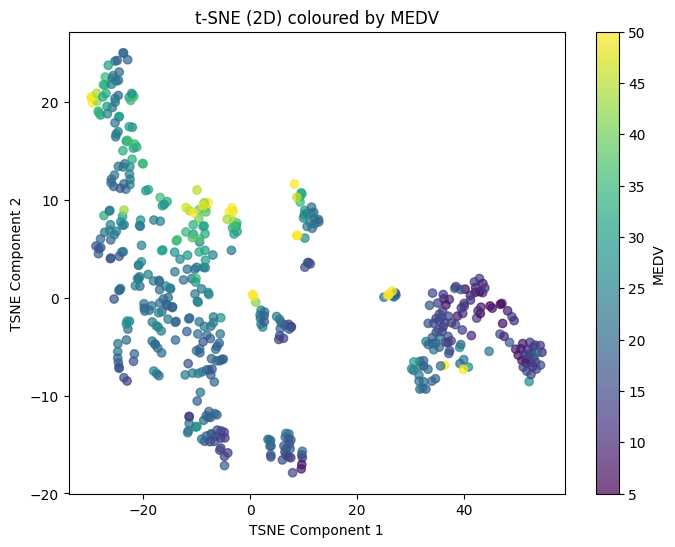

In [87]:
#Aplicamos el t-SNE
tsne = TSNE(
    n_components=2,
    perplexity=30,
    learning_rate=200,
    random_state=42
)

X_tsne = tsne.fit_transform(X_scaled)

#Y lo graficamos
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=data['MEDV'], cmap="viridis", alpha=0.7)

plt.colorbar(scatter, label="MEDV")
plt.xlabel("TSNE Component 1")
plt.ylabel("TSNE Component 2")
plt.title("t-SNE (2D) coloured by MEDV")
plt.show()

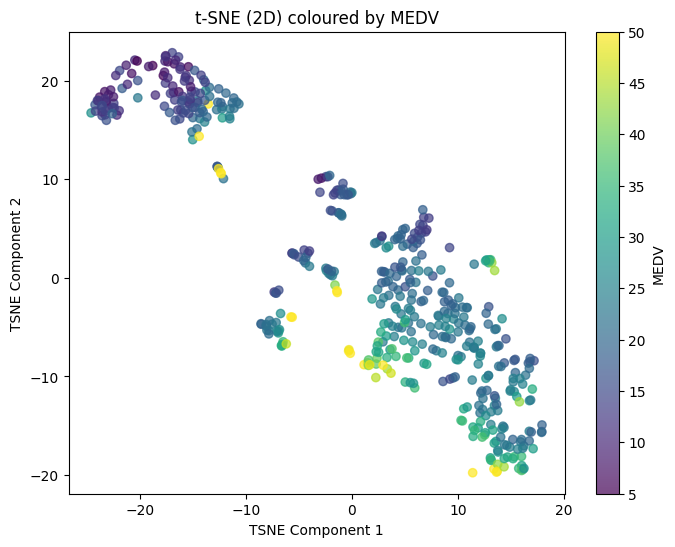

In [88]:
#Graficamos cambiando los valores de "perplexity" y "Learning rate"
tsne = TSNE(
    n_components=2,
    perplexity=50,
    learning_rate=400,
    random_state=42
)

X_tsne = tsne.fit_transform(X_scaled)

#Y lo graficamos
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=data['MEDV'], cmap="viridis", alpha=0.7)

plt.colorbar(scatter, label="MEDV")
plt.xlabel("TSNE Component 1")
plt.ylabel("TSNE Component 2")
plt.title("t-SNE (2D) coloured by MEDV")
plt.show()

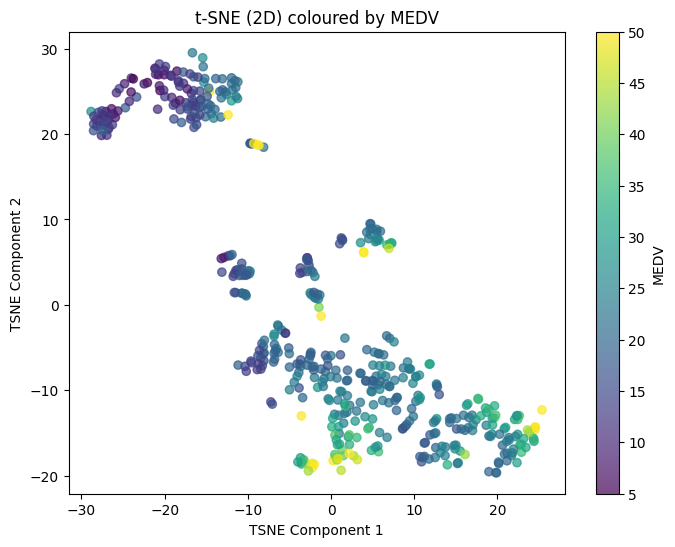

In [89]:
#Graficamos cambiando los valores de "perplexity" y "Learning rate"
tsne = TSNE(
    n_components=2,
    perplexity=40,
    learning_rate=400,
    random_state=42
)

X_tsne = tsne.fit_transform(X_scaled)

#Y lo graficamos
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=data['MEDV'], cmap="viridis", alpha=0.7)

plt.colorbar(scatter, label="MEDV")
plt.xlabel("TSNE Component 1")
plt.ylabel("TSNE Component 2")
plt.title("t-SNE (2D) coloured by MEDV")
plt.show()

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Análisis:</strong>
<br> Observando los dos gráficos, ¿consideras que la reducción de dimensionalidad ha funcionado adecuadamente? ¿Crees que las 2 nuevas dimensiones logran explicar la variación de MEDV y permiten visualizar de manera diferenciada los precios altos y bajos? Si utilizáramos las 2 nuevas variables para predecir MEDV, ¿con cuál de los dos métodos de reducción de dimensionalidad (PCA o TSNE) obtendríamos mejores resultados?
    
¿Por qué crees que obtenemos resultados tan diferentes entre ambos métodos?
</div>


Si bien PCA a dos componentes reduce la dimensionalidad de los datos, al tener relativamente pocas variables es realmente dificil que con tan solo dos componentes expliquemos suficiente variabilidad como para ser utilizadas para la predicción.



---
## <font color='264CC7'> Entrenamiento y test </font>

En este último ejercicio se trata de aplicar un método de aprendizaje supervisado, concretamente el Linear Regression y K-means, para predecir las variables MEDV y CHAS, resectivamente, y evaluar la precisión obtenida con los modelo. Para eso usaremos:
<ul>
    <li>El conjunto de datos original con todos los atributos</li>
    <li>El conjunto de datos reducido a sólo 2 atributos con PCA</li>
</ul>

Divide los datos en dos conjuntos: uno para entrenamiento y otro para prueba y visualiza la dimensión de cada conjunto. Usar `random_state` igual al últmo número de tu cédula.

### <font color='264CC7'> Regresión </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Usando el conjunto de datos original:
    
<ul>
    <li>Divide el dataset en train y test.</li>
    <li>Define un modelo Linear Regression.</li>
    <li>Aplica validación cruzada con el modelo definido y el dataset de train (con cv=5 es suficiente).</li>
    <li>Como métricas para cuantificar el error del modelo, utiliza R2 (coeficiente de determinación) y MAE (media del error absoluto) separadamente.</li>
    <li>Calcula la media y la desviación estándar del error obtenido en cada caso.</li>
</ul>
    
<hr>
Sugerencia: Para aplicar validación cruzada, utiliza 'cross_val_score' de sklearn y modifica su parámetro 'scoring' si es necesario.<br>
</div>


In [90]:
#Dividimos nuestro dataset original en train y test (MEDV)
X_reg = data.drop(columns=["MEDV"])
y_reg = data["MEDV"]

X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(
    X_reg, y_reg,
    test_size=0.2,
    random_state=6
)

print("Dimensiones REGRESIÓN:")
print("Train:", X_reg_train.shape, y_reg_train.shape)
print("Test:", X_reg_test.shape, y_reg_test.shape)
print()

#Definimos el modelo de regresion
model_lr = LinearRegression()

#Error con R2
scores_r2 = cross_val_score(
    model_lr,
    X_reg_train,
    y_reg_train,
    scoring="r2",
    cv=5
)

print("R2 por fold:", scores_r2)
print("R2 promedio:", scores_r2.mean())
print("R2 desviación estándar:", scores_r2.std())

#Validacion con MAE
scores_mae = cross_val_score(
    model_lr,
    X_reg_train,
    y_reg_train,
    scoring="neg_mean_absolute_error",
    cv=5
)

# Convertimos los valores negativos a positivos
scores_mae = -scores_mae

print("\nMAE por fold:", scores_mae)
print("MAE promedio:", scores_mae.mean())
print("MAE desviación estándar:", scores_mae.std())

Dimensiones REGRESIÓN:
Train: (404, 13) (404,)
Test: (102, 13) (102,)

R2 por fold: [0.73571463 0.617344   0.74282282 0.72841176 0.75558267]
R2 promedio: 0.715975174453227
R2 desviación estándar: 0.05012379273295684

MAE por fold: [3.52094679 3.67664498 3.73975977 3.32269945 2.94817372]
MAE promedio: 3.4416449425606013
MAE desviación estándar: 0.28567398855578874


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Repite el mismo procedimiento que en el ejercicio anterior, pero utilizando el dataset reducido a 2 dimensiones con PCA.
</div>


In [93]:
#Preparamos la data usando el PCA
X_reg_pca = X_pca

#Dividimos train y test
X_reg_train_pca, X_reg_test_pca, y_reg_train, y_reg_test = train_test_split(
    X_reg_pca, y_reg, test_size=0.2, random_state=6
)

#Aplicamos el modelo
model_lr_pca = LinearRegression()

# R2
scores_r2_pca = cross_val_score(
    model_lr_pca, X_reg_train_pca, y_reg_train,
    scoring="r2", cv=5
)

# MAE
scores_mae_pca = -cross_val_score(
    model_lr_pca, X_reg_train_pca, y_reg_train,
    scoring="neg_mean_absolute_error", cv=5
)

print("=== Regresión con PCA existente (2 componentes) ===")
print("R2 promedio:", scores_r2_pca.mean())
print("R2 std:", scores_r2_pca.std())
print("\nMAE promedio:", scores_mae_pca.mean())
print("MAE std:", scores_mae_pca.std())

=== Regresión con PCA existente (2 componentes) ===
R2 promedio: 0.44996078162555986
R2 std: 0.06838677513250598

MAE promedio: 4.909281381127425
MAE std: 0.2555566270935619


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Análisis:</strong><br>
¿Con qué datos ha funcionado mejor el modelo? ¿Tiene sentido el resultado? ¿Está alineado con los resultados observados en el ejercicio 3?
</div>


Podemos ver que para el modelo usando PCA obtenemos un R2 promedio menor y un MAE mayor, lo que nos dice que explica menos la variablidad de MEDV y con un mayor error. Esto tiene sentido puesto a que realmente 13 variables (excluyendo la que predice) realemnte no son una gran cantidad de variables, por lo que al reducirlas por PCA y más, solo usar 2 componentes de esta hace que se pierda una gran cantidad de datos útiles.

Tal vez a mayor cantidad de columnas o usar una o dos componentes más mejoraría los resultados

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Con el mejor modelo que hayas obtenido:
    
<ul>
  <li>Genera predicciones sobre el dataset de test.</li>
  <li>Calcula la precisión de las predicciones obtenidas usando R2 (coeficiente de determinación) y MAE (media del error absoluto).</li>
</ul>

<hr>
Sugerencia: Para calcular R2 y MAE, utiliza las funciones disponibles en el módulo "metrics" de sklearn.
</div>


In [104]:
# 1. Ajustar el modelo con los datos de entrenamiento
model_lr.fit(X_reg_train, y_reg_train)

# 2. Hacer predicciones sobre el set de test
y_reg_pred = model_lr.predict(X_reg_test)

# 3. Calcular R2 y MAE en el test set
r2_test = r2_score(y_reg_test, y_reg_pred)
mae_test = mean_absolute_error(y_reg_test, y_reg_pred)

print("=== Resultados en el Test Set ===")
print("R2 en test:", r2_test)
print("MAE en test:", mae_test)

=== Resultados en el Test Set ===
R2 en test: 0.6839026890069024
MAE en test: 3.8112195840097494


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Análisis:</strong><br>
¿Cuál de las dos métricas propuestas para evaluar los modelos (R2 o MAE) usarías para explicar la calidad del modelo a un ejecutivo de una inmobiliaria? ¿Y cuál usarías para explicarlo a un analista matemático de la misma compañía? ¿Por qué?  
</div>


Para explicar el modelo a un ejecutivo de una inmobiliaria usaría MAE dado a que este está en unidades monetarias y eso lo hace más entendible sin necesidad de conocimiento técnico.

Para un analísta matemático usaría R2 dado que explica el porcentaje que el modelo explica en cuanto a la variabilidad de la variable objetivo, algo mucho más abstracto y que requiere conocimiento técnico.

### <font color='264CC7'> Clasificación </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Usando el conjunto de datos original:
    
<ul>
    <li>Divide el dataset en train y test.</li>
    <li>Define un modelo K-means.</li>
    <li>Como métricas para cuantificar el error del modelo, utiliza la precisión, la sensibilidad y f1-score.</li>
</ul>



In [91]:
#Ahora lo dividimos para CHAS
X_clf = data.drop(columns=["CHAS"])
y_clf = data["CHAS"]

X_clf_train, X_clf_test, y_clf_train, y_clf_test = train_test_split(
    X_clf, y_clf,
    test_size=0.2,
    random_state=6,
    stratify=y_clf   # mantiene proporciones 0/1
)

print("\nDimensiones CLASIFICACIÓN:")
print("Train:", X_clf_train.shape, y_clf_train.shape)
print("Test:", X_clf_test.shape, y_clf_test.shape)

#definimos el modelo de clasificación
model_clf = KMeans(n_clusters=2)

#Vemos el accuracy
scores_acc = cross_val_score(
    model_clf,
    X_clf_train,
    y_clf_train,
    scoring="accuracy",
    cv=5
)

print("Accuracy por fold:", scores_acc)
print("Accuracy promedio:", scores_acc.mean())
print("Accuracy desviación estándar:", scores_acc.std())

#Y el F1-score
scores_f1 = cross_val_score(
    model_clf,
    X_clf_train,
    y_clf_train,
    scoring="f1",
    cv=5
)

print("\nF1-score por fold:", scores_f1)
print("F1-score promedio:", scores_f1.mean())
print("F1-score desviación estándar:", scores_f1.std())


Dimensiones CLASIFICACIÓN:
Train: (404, 13) (404,)
Test: (102, 13) (102,)
Accuracy por fold: [0.67901235 0.72839506 0.71604938 0.64197531 0.65      ]
Accuracy promedio: 0.6830864197530864
Accuracy desviación estándar: 0.03446987865767143

F1-score por fold: [0.         0.08333333 0.17142857 0.17142857 0.06666667]
F1-score promedio: 0.09857142857142856
F1-score desviación estándar: 0.06570048164193212


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Repite el mismo procedimiento que en el ejercicio anterior, pero utilizando el dataset reducido a 2 dimensiones con PCA.
</div>


In [98]:
# Eliminamos la variable objetivo CHAS
X_clf_original = data.drop(columns=["CHAS"])

# Estandarizamos
scaler_clf = StandardScaler()
X_clf_scaled = scaler_clf.fit_transform(X_clf_original)

# PCA con 2 componentes
pca_clf = PCA(n_components=2)
X_clf_pca_2 = pca_clf.fit_transform(X_clf_scaled)

# Convertimos a DataFrame
X_clf_pca_df = pd.DataFrame(X_clf_pca_2, columns=["PC1", "PC2"])

y_clf = data["CHAS"]   # variable objetivo correcta

X_clf_train_pca, X_clf_test_pca, y_clf_train, y_clf_test = train_test_split(
    X_clf_pca_df, y_clf,
    test_size=0.2,
    random_state=6,
    stratify=y_clf
)

model_clf_pca = KMeans(n_clusters=2)

# Accuracy
scores_acc_pca = cross_val_score(
    model_clf_pca, X_clf_train_pca, y_clf_train,
    scoring="accuracy", cv=5
)

# F1
scores_f1_pca = cross_val_score(
    model_clf_pca, X_clf_train_pca, y_clf_train,
    scoring="f1", cv=5
)

print("=== Clasificación con PCA (excluyendo CHAS) ===")
print("Accuracy por fold:", scores_acc_pca)
print("Accuracy promedio:", scores_acc_pca.mean())
print("Accuracy std:", scores_acc_pca.std())

print("\nF1 por fold:", scores_f1_pca)
print("F1 promedio:", scores_f1_pca.mean())
print("F1 std:", scores_f1_pca.std())

=== Clasificación con PCA (excluyendo CHAS) ===
Accuracy por fold: [0.45679012 0.61728395 0.64197531 0.38271605 0.6875    ]
Accuracy promedio: 0.5572530864197531
Accuracy std: 0.11687754473526556

F1 por fold: [0.05263158 0.10714286 0.06451613 0.         0.19354839]
F1 promedio: 0.08356779044385157
F1 std: 0.06473809696609878


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Análisis:</strong><br>
¿Cuál de las dos métricas propuestas para evaluar los modelos (precisión, sensibilidad o f1-score) usarías para explicar la calidad del modelo a un ejecutivo de una inmobiliaria? ¿Y cuál usarías para explicarlo a un analista matemático de la misma compañía? ¿Por qué? ¿El modelo es mejor discriminando o acertando? ¿Cómo se interpreta esto último?


Al ejecutivo le presentaría la precisión ya que da un valor mucho más calro, que en este caso es el porcentaje de casas que se predijeron cerca del río Charles.

Para el analísta usaría sensibilidad por ser la presición algo engañosa, F1 nos muestra que tan bien clasifica el modelo, pero nos da un dato más abstracto.

En ambos casos el modelo presenta un alto accuracy (al menos más que F1) y un bajo F1, esto nos dice que el modelo es bueno acertando gracias a su alta presición, pero es muy malo discriminando (visto en su bajo F1).